<a href="https://colab.research.google.com/github/taesangeom/SK-T-Academy/blob/main/DL/02_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GPU를 사용해서 하시면 좋습니다!!!!
# 이번 실습은 CPU로 해도,,,조금 느린 정도..
# Conv에서 할 때는 무조건 GPU입니다!!!

In [2]:
# MNIST : 손글씨 데이터 셋 0~9까지 10개의 클래스에 대한 분류 데이터셋!!!
# --> 1장 데이터  : 28 by 28 2D
#     ML : 28*28 = 784 1차원 벡터.....
#     TF : 굳이 내가 안풀고,,input_layer(input_shape) : 2D 그대로 처리를 하는!!!
#          이미지라는 2D상의 문맥/ 데이터의 특징은 살리지 않음!!
# --> 데이터 셋 : 60000, 28, 28 ==> 3D

# FashionMNIST : 의상 관련된 이미지 분류 셋!!!!
# --> 1장 : 28 by 28 ==> 2D 흑백
# --> DL을 10가지 의상 분류 모델!!!!!
#     데이터가 특성이 이미지 데이터 : CNN 계열을 사용해야 좋은데,,
#                                     일반적인 NN구조로만 해보겠습니다.
# ==> 구조 : 일반적인 Dense를 적층하는 구조를 사용해서 설계!!!!!
# + CNN구조들로 설계 방식을 변경하겠다!!!!

In [3]:
28*28

784

In [4]:
import tensorflow as tf

In [5]:
# 나중에 데이터 핸들링이 필요하다면 pandas , numpy  사

In [6]:
# 데이터 셋 -> 수집
fashion_mnist=tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [7]:
(train_X, train_y), (test_X, test_y)=fashion_mnist.load_data()
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
# 2. 전처리 + EDA
#이미지에 대한 전처리 : openCV
## + resize, crop, 색상변화 etc

In [9]:
import matplotlib.pyplot as plt

9


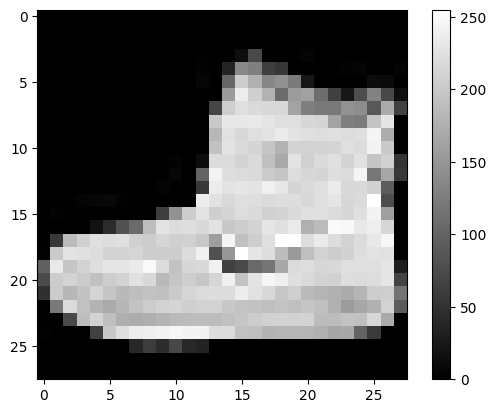

In [10]:
plt.imshow( train_X[0], cmap="gray")
plt.colorbar()
print(train_y[0])

In [11]:
# 8비트 흑백 이미지
# 값 재조정
train_X=train_X/255.0
test_X=test_X/255.0

9


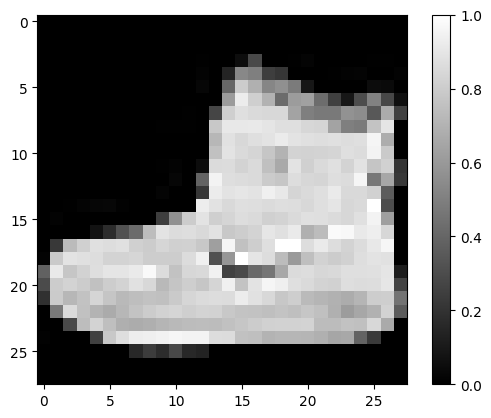

In [12]:
plt.imshow( train_X[0], cmap="gray")
plt.colorbar()
print(train_y[0])  # 0 에서 1 사이로 핸들링

In [13]:
# 3. 분류 모델 설계
# 1개 샘플 기준으로 ㅣ train_X[0].shape : 28 28 2D

# 설계 방식 : 전통적인 DNN 구조로 설계
# DNN 으로 설계 : 입력 데이터를 1D 로 변환 -> Flatten + input_layer : 784개 노드 코드가 input_shape = (28,28)
#        2) HL : 1개 층만 쌓아서 설계!!!!
#                 node : 128, AF : reulu
#        3) OL : 모델의 목적이 10개의 분류!!!!
#                 node : 무조건 10개, AF : 확률로 출력 softmax
# +++++++ 주의!!!!
# 정답 train_y는 라벨인코딩!!! ===> DL 출력에 대한 정답 : 원핫인코딩!!!
#              **** 지금 주어진 정답 : 라벨인코딩 1D
#              **** 원래 OL에 대한 연결된 정답 : 원핫인코딩 2D

In [14]:
 train_y[0]

9

In [15]:
model=tf.keras.Sequential(   #설계도
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),  # 쌓는 순서 입력 -> 출력 , 차원변경 2D -> 1D + input layer ( 입력층 )
        tf.keras.layers.Dense(units=128, activation="relu"),  # 은닉층  : 일반적인 Dense -> 128개 노드 , AF : relu
        tf.keras.layers.Dense(units=10, activation="softmax")       #출력층 : 모델의 목적 : 10개 분류
    ]
)
model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential, built=True>

In [16]:
model.summary()
#  본 그림에 대한 숫자, 왜 이렇게 나오는지 이해.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
784*128

100352

In [18]:
(784+1)*128  # 바이어스 항 까지

100480

In [19]:
(128+1)*10

1290

In [20]:
# 이 모델에 대한 10만개의 가중치들을 어떻게 찾고, 학습할까
model.compile(
    loss="categorical_crossentropy", #손실함수 , 정답은 one hot encoding 으로 해야함
    optimizer="adam", # or tf.keras.optimizers.Adam()
    metrics=["accuracy"] # 모니터링에 대한 지표

    )

In [21]:
train_y[0]
# [0,0,0,0,0,0,0,0,1]  # 10종류 분류시 9의 값에 대한 표현

# if 20종류에 대하 9 값 표현 :
# [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]

9

In [22]:
tf.keras.utils.to_categorical(train_y[0],num_classes=10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [23]:
tf.keras.utils.to_categorical(train_y[0],num_classes=20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [24]:
#모델 학습
history = model.fit(
    train_X, # 문제지
    tf.keras.utils.to_categorical(train_y,num_classes=10), # 이렇게 one hot encoding , 정답지  or 손실함수에 sparse 붙이거나 (모양 맞추기)
    epochs=100 ,# 많이 돌리면 train  성능은 무조건 올라가지만. 과적합 가능성
    batch_size=256 ,# HW spec  GPU의 RAM 과 연관 -> 176/176 이 숫자와 연관
    validation_split=0.25 # 옵션

)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6769 - loss: 0.9566 - val_accuracy: 0.8319 - val_loss: 0.4830
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8421 - loss: 0.4622 - val_accuracy: 0.8507 - val_loss: 0.4300
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8567 - loss: 0.4130 - val_accuracy: 0.8532 - val_loss: 0.4127
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8694 - loss: 0.3752 - val_accuracy: 0.8600 - val_loss: 0.4020
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8727 - loss: 0.3596 - val_accuracy: 0.8658 - val_loss: 0.3746
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8761 - loss: 0.3499 - val_accuracy: 0.8661 - val_loss: 0.3753
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8840 - loss: 0.3271 - val_accuracy: 0.8676 - val_loss: 0.3631
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8884 - loss: 0.3142 - val_ac

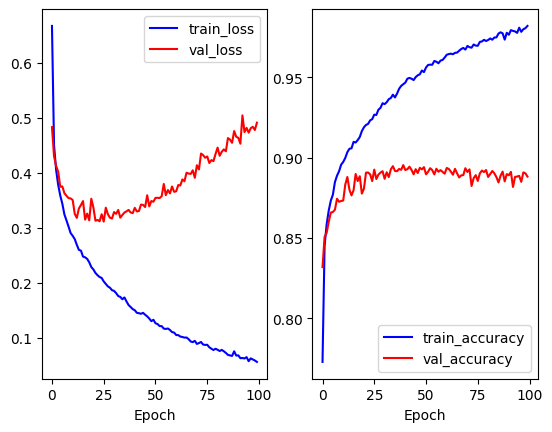

In [25]:
# 위의 결과를 그래프로 그려보자!!!
plt.subplot(1,2,1) # loss

plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

In [26]:
# 실제 X_test에 대한 평가

model.evaluate(test_X, tf.keras.utils.to_categorical(test_y,num_classes=10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8843 - loss: 0.5197


[0.5301977396011353, 0.8820000290870667]

In [27]:
#전체 데이터 셋에 대한 평가가 아니라 특정 데이터에 대한 예측값 뽑기 위해서는
y_pred=model.predict(test_X)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.39035570e-18, 1.08288023e-18, 3.81312395e-16, ...,
        1.51963479e-06, 1.07063414e-10, 9.99997914e-01],
       [2.32012368e-07, 9.56651235e-27, 9.99886334e-01, ...,
        1.65982866e-23, 1.04237747e-16, 2.52842165e-20],
       [3.23356945e-17, 9.99999940e-01, 1.41835803e-20, ...,
        1.63069429e-30, 3.78915136e-22, 1.01092235e-32],
       ...,
       [7.16203061e-08, 1.08661953e-17, 3.92305632e-11, ...,
        3.69325699e-06, 9.99996126e-01, 9.35296345e-18],
       [3.81529091e-13, 9.99999940e-01, 3.04839399e-14, ...,
        3.01878646e-14, 6.59953169e-12, 5.79750923e-20],
       [4.67282429e-14, 2.97511547e-14, 1.72564565e-14, ...,
        1.26339010e-08, 5.14617758e-11, 2.46639428e-12]], dtype=float32)

In [28]:
y_pred[0]

array([6.39035570e-18, 1.08288023e-18, 3.81312395e-16, 1.91230542e-15,
       7.68630038e-12, 5.08037658e-07, 1.06487105e-13, 1.51963479e-06,
       1.07063414e-10, 9.99997914e-01], dtype=float32)

In [29]:
y_pred[0].sum()

0.99999994

In [30]:
y_pred[0].argmax()

9

In [31]:
# 내일 : 오늘 skip한 디테일한 부분을 내용
# + 코드 : 좀 더 deep한 구조
# + 테크니컬 : OF피하는 방법 중에서 dropout, 정규화...etc
# ==> 모델의 구조를 변경하면서,,,최적의 모델을 찾아가는 것!!!!
# + 중간에 모델들을 저장을 하는 callbacks : 모델 svae & load

# 내용!!!
# 네트워크 구조와 함수적인 관점 + 행렬적인 부분!!!!
# 행렬의 표현!!!!!!!! 행렬의 곱
# ==> 학습에 대한 부분이 어떻게 되는지..
#     deep 경우에 잇어서,,,Loss & parameter 1개 어떻게 연결이 되는지...
#     backpropagation & gradient vanishing!!!!
#     ==> AF : relu
# ==> optimizer : GD ---> adam
# + 코드적에서 분류에서 아웃풋 레이어 설계 & loss function & 정답지 표현!!!!!

# 꼭 손으로 그려가면서 이해를 해보시면 됩니다!!!!!
# 이해가 안 되거나,,

In [ ]:
# 위 결과는 대충 0.88 - 0.90 정도 나오는 것 같다.
# epoch 더 해봤자 과적합 걸린다'

# 일반적인 NN 의 구조에서
# 실험 1: 입력 - 은닉1 -출력
# 실험 2 : 입력 -은닉 3 - 출력
# -> 모델 구조 변경 -> 비선형성을 여러 레이어를 거치며 추구를 하겠다.

# DL 같은 경우는 크게 좌우되는 경우가 모델의 구조-> 구조가 제일 중요하다
# node 수, 활성함수 종류 , 파리미터 설정 -> 마이너한 부분이다
# 선행연구 ㄱㄱ

In [32]:
model2=tf.keras.Sequential(   #설계도
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),  # 쌓는 순서 입력 -> 출력 , 차원변경 2D -> 1D + input layer ( 입력층 )

        tf.keras.layers.Dense(units=128, activation="relu"),  # 은닉층  : 일반적인 Dense -> 128개 노드 , AF : relu
        tf.keras.layers.Dense(units=64, activation="relu"),
        tf.keras.layers.Dense(units=32, activation="relu"), # 은닉층 3개로 수정 , 은닉층 노드 수 128->64->32 줄여나가볼게 (정답없음), 다 병렬로 해봐도 되고 실험임 다

        tf.keras.layers.Dense(units=10, activation="softmax")       #출력층 : 모델의 목적 : 10개 분류
    ]
)
model2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_1, built=True>

In [33]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
(128+1)*64

8256

In [35]:
# 이 모델에 대한 10만개의 가중치들을 어떻게 찾고, 학습할까
model2.compile(
    loss="categorical_crossentropy", #손실함수 , 정답은 one hot encoding 으로 해야함
    optimizer="adam", # or tf.keras.optimizers.Adam()
    metrics=["accuracy"] # 모니터링에 대한 지표

    )

In [36]:
#모델 학습
history2 = model2.fit(
    train_X, # 문제지
    tf.keras.utils.to_categorical(train_y,num_classes=10), # 이렇게 one hot encoding , 정답지  or 손실함수에 sparse 붙이거나 (모양 맞추기)
    epochs=100 ,# 많이 돌리면 train  성능은 무조건 올라가지만. 과적합 가능성
    batch_size=256 ,# HW spec  GPU의 RAM 과 연관 -> 176/176 이 숫자와 연관
    validation_split=0.25 # 옵션

)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6730 - loss: 1.0286 - val_accuracy: 0.8321 - val_loss: 0.4779
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8374 - loss: 0.4632 - val_accuracy: 0.8480 - val_loss: 0.4257
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8617 - loss: 0.3952 - val_accuracy: 0.8629 - val_loss: 0.3874
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8731 - loss: 0.3595 - val_accuracy: 0.8641 - val_loss: 0.3835
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8756 - loss: 0.3412 - val_accuracy: 0.8720 - val_loss: 0.3527
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8850 - loss: 0.3129 - val_accuracy: 0.8708 - val_loss: 0.3531
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8892 - loss: 0.3047 - val_accuracy: 0.8701 - val_loss: 0.3549
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8946 - loss: 0.2892 - val_a

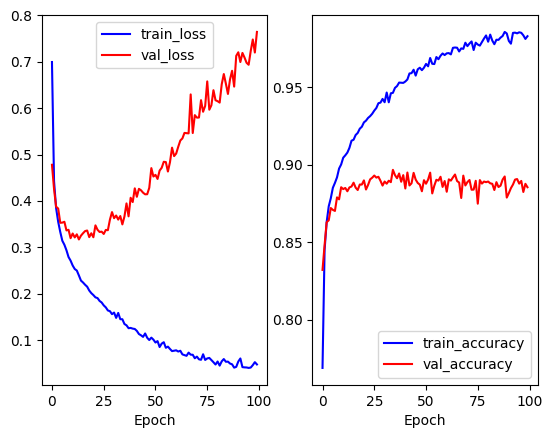

In [37]:
# 위의 결과를 그래프로 그려보자!!!
plt.subplot(1,2,1) # loss

plt.plot(history2.history["loss"], "b-", label="train_loss")
plt.plot(history2.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history2.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history2.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

In [38]:
model2.evaluate(test_X, tf.keras.utils.to_categorical(test_y,num_classes=10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.8475


[0.8583849668502808, 0.8772000074386597]

In [ ]:
# 여기까지 내용을 보면
# DNN 구조를 사용을 해서 봤더니...
# HL을 좀 더 쌓아서 했더니...
# 비선형이 늘어서,,,,OF 빨리. 심하게 걸리는 것 같은데,,,,
# 문제는 모델의 성능은 그닥;;;; 0.88~0.90 사이를 벗어나지 못하고 있음!!!!!!
# OF 문제가 되는거 같다!!!!!

# ===> 모델의 구조에서 OF을 좀 완하시키는 기술적인 방법
#      + 다른 설계 방식 CNN 고려
# + 드롭아웃 등

In [39]:
model2=tf.keras.Sequential(   #설계도
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),  # 쌓는 순서 입력 -> 출력 , 차원변경 2D -> 1D + input layer ( 입력층 )

        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거

        tf.keras.layers.Dense(units=128, activation="relu"),  # 은닉층  : 일반적인 Dense -> 128개 노드 , AF : relu
        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거
        tf.keras.layers.Dense(units=64, activation="relu"),
        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거
        tf.keras.layers.Dense(units=32, activation="relu"), # 은닉층 3개로 수정 , 은닉층 노드 수 128->64->32 줄여나가볼게 (정답없음), 다 병렬로 해봐도 되고 실험임 다

        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거

        tf.keras.layers.Dense(units=10, activation="softmax")       #출력층 : 모델의 목적 : 10개 분류
    ]
)
model2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_2, built=True>

In [40]:
# 이 모델에 대한 10만개의 가중치들을 어떻게 찾고, 학습할까
model2.compile(
    loss="categorical_crossentropy", #손실함수 , 정답은 one hot encoding 으로 해야함
    optimizer="adam", # or tf.keras.optimizers.Adam()
    metrics=["accuracy"] # 모니터링에 대한 지표

    )

In [41]:
#모델 학습
history2 = model2.fit(
    train_X, # 문제지
    tf.keras.utils.to_categorical(train_y,num_classes=10), # 이렇게 one hot encoding , 정답지  or 손실함수에 sparse 붙이거나 (모양 맞추기)
    epochs=100 ,# 많이 돌리면 train  성능은 무조건 올라가지만. 과적합 가능성
    batch_size=256 ,# HW spec  GPU의 RAM 과 연관 -> 176/176 이 숫자와 연관
    validation_split=0.25 # 옵션

)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5540 - loss: 1.2994 - val_accuracy: 0.8257 - val_loss: 0.4999
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7992 - loss: 0.5770 - val_accuracy: 0.8494 - val_loss: 0.4217
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8319 - loss: 0.4826 - val_accuracy: 0.8571 - val_loss: 0.3943
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8462 - loss: 0.4343 - val_accuracy: 0.8621 - val_loss: 0.3743
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8522 - loss: 0.4091 - val_accuracy: 0.8679 - val_loss: 0.3611
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8571 - loss: 0.3883 - val_accuracy: 0.8731 - val_loss: 0.3478
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8637 - loss: 0.3742 - val_accuracy: 0.8777 - val_loss: 0.3406
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8708 - loss: 0.3571 - 

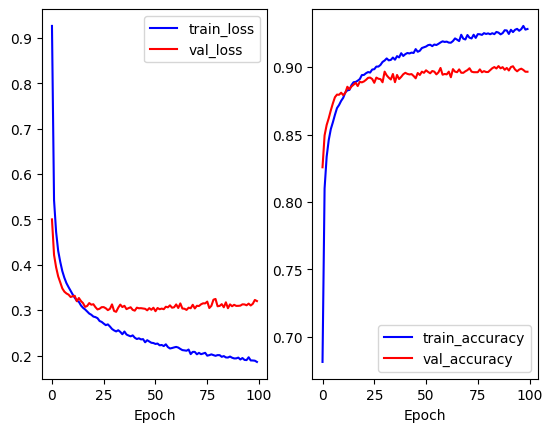

In [42]:
# 위의 결과를 그래프로 그려보자!!!
plt.subplot(1,2,1) # loss

plt.plot(history2.history["loss"], "b-", label="train_loss")
plt.plot(history2.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history2.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history2.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

In [43]:
model2.evaluate(test_X,tf.keras.utils.to_categorical(test_y))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8915 - loss: 0.3497


[0.34277403354644775, 0.8935999870300293]

In [ ]:
# **** 기본적으로 모델의 구조 & 모델의 구적적인 설정
# ==> 학습의 방향성이나 성능을 좌우하게 된다!!!!!!!!!

In [44]:
#모델 저장
import os
# 1. 모델의 구조(설계도)
# 2. 내부의 가중치 값


In [52]:
# ==> 학습하는 과정에서 모델별로 weights 저장을 하고 싶다!!!!
# 1) callback : 학습 과정의 epoch가 끝나면,,,그 때의 모델을 저장하고 싶다.
#               ==> 과거의 적당한 epoch 들을 불러와서 사용하고 싶을 때...
checkpoint_path = "training2/cp-{epoch:04d}.weights.h5" # --> cp에 대한 메뉴얼 참고 : 파일명 뒤에.
checkpoint_dir  = os.path.dirname(checkpoint_path)
# ==> 각 epoch 마다 저장할 폴더 경로 & 저장할 파일명 양식

# -- callback 에 대한 세팅!!!!
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    verbose = 1,
    save_weights_only = True
    #save_best_only=True  # 이건 베스트에 기준이 모호하므로 일단 다 저장하는게 방법 , 숫자와 괴리가 크다
) # --> CP에 대한 원하는 저장에 대한 옵션들을 지정할 수 있음!!!!!
# --> 매 번 epoch마다 모델의 weights만 저장하도록 한 것!!!#


# 2) callback : 모델을 학습 하는 과정에서 중간에 때려칠 용기를 부여!!!
#                earlystopping
#    ==> 무엇을 기준으로 때려칠 것인가!!!!!!!! ( 꼭은 아니지만, 주로 val )
#    ==> 몇 번의 기회를 줄 것인가!!!!!!!
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience = 5
) # -- 예 : val_loss를 기준을 삼아서,,,5번까지 내에서 더이상의 0.00000001이라도 개선이 없으면
# epoch 아무리 많이 남아 있어도,,,더이상의 학습의 개선은 없다고 판단해서 때려치겠다!!!!

In [53]:
model2=tf.keras.Sequential(   #설계도
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),  # 쌓는 순서 입력 -> 출력 , 차원변경 2D -> 1D + input layer ( 입력층 )

        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거

        tf.keras.layers.Dense(units=128, activation="relu"),  # 은닉층  : 일반적인 Dense -> 128개 노드 , AF : relu
        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거
        tf.keras.layers.Dense(units=64, activation="relu"),
        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거
        tf.keras.layers.Dense(units=32, activation="relu"), # 은닉층 3개로 수정 , 은닉층 노드 수 128->64->32 줄여나가볼게 (정답없음), 다 병렬로 해봐도 되고 실험임 다

        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거

        tf.keras.layers.Dense(units=10, activation="softmax")       #출력층 : 모델의 목적 : 10개 분류
    ]
)

# 이 모델에 대한 10만개의 가중치들을 어떻게 찾고, 학습할까
model2.compile(
    loss="categorical_crossentropy", #손실함수 , 정답은 one hot encoding 으로 해야함
    optimizer="adam", # or tf.keras.optimizers.Adam()
    metrics=["accuracy"] # 모니터링에 대한 지표

    )


#모델 학습
history2 = model2.fit(
    train_X, # 문제지
    tf.keras.utils.to_categorical(train_y,num_classes=10), # 이렇게 one hot encoding , 정답지  or 손실함수에 sparse 붙이거나 (모양 맞추기)
    epochs=100 ,# 많이 돌리면 train  성능은 무조건 올라가지만. 과적합 가능성
    batch_size=256 ,# HW spec  GPU의 RAM 과 연관 -> 176/176 이 숫자와 연관
    validation_split=0.25, # 옵션


    #callbacks !!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #  사전에 원하는 callbacks에 대하여 세팅
    callbacks=[es_callback , cp_callback]

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5618 - loss: 1.2494
Epoch 1: saving model to training2/cp-0001.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5625 - loss: 1.2474 - val_accuracy: 0.8245 - val_loss: 0.5051
Epoch 2/100
173/176 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8065 - loss: 0.5636
Epoch 2: saving model to training2/cp-0002.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8067 - loss: 0.5630 - val_accuracy: 0.8489 - val_loss: 0.4215
Epoch 3/100
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8344 - loss: 0.4728
Epoch 3: saving model to training2/cp-0003.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8344 - loss: 0.4727 - val_accuracy: 0.8585 - val_loss: 0.3912
Epoch 4/100
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8444 - loss: 0.4393
Epoch 4: saving model to training2/cp-0004.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8444 - loss: 0.4393 - va

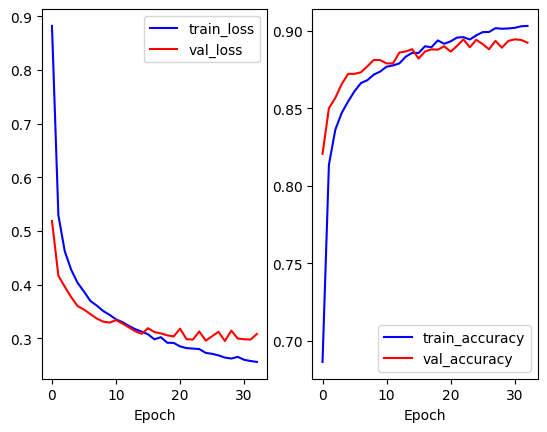

In [50]:
# 위의 결과를 그래프로 그려보자!!!
plt.subplot(1,2,1) # loss

plt.plot(history2.history["loss"], "b-", label="train_loss")
plt.plot(history2.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history2.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history2.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

In [51]:
model2.evaluate(test_X,tf.keras.utils.to_categorical(test_y))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8835 - loss: 0.3266


[0.3364129066467285, 0.8834999799728394]

In [ ]:
###  ===> 기본적으로 설계 방식을 평범함 인공신경망구조를 사용을 하면,,,
###       0.88~0.90 사이 정도의 한계가 있는거 같다!!!!!!
###  ===> 이 방식에서 구체적인 설계를 변경을 하면 성능의 개선의 한계가 존재!!!!
###       +++ 기본 설계 방식에 대한 고민!!!!!!
###       +++ CNN으로 처리하면,,,기본 베이스가 0.9X...
### 그래서 DL에서는 최근에 나오거 해당하는 주제에 대한 좋은 설계방식을 차용!!!!
###  + 내 데이터에 맞는 최적의 설계를 완성을 해야함!!!!!
###  + 근본적인 성능의 개선을 위해서는 설계 방식에 많이 기대고 있음!!!!! + 논문조사!!!

In [54]:
## +++ 내가 학습 하는 과정에서 미리 저장해둔 모델의 weights 를 불러와서
## 적당한 epoch때의 모델을 사용하고 싶다!!!!!

load_cp_weights='/content/training2/cp-0023.weights.h5'
#껍데기
model_bc=tf.keras.Sequential(   #설계도
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),  # 쌓는 순서 입력 -> 출력 , 차원변경 2D -> 1D + input layer ( 입력층 )

        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거

        tf.keras.layers.Dense(units=128, activation="relu"),  # 은닉층  : 일반적인 Dense -> 128개 노드 , AF : relu
        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거
        tf.keras.layers.Dense(units=64, activation="relu"),
        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거
        tf.keras.layers.Dense(units=32, activation="relu"), # 은닉층 3개로 수정 , 은닉층 노드 수 128->64->32 줄여나가볼게 (정답없음), 다 병렬로 해봐도 되고 실험임 다

        tf.keras.layers.Dropout(0.1) , # 드롭 아웃 ,  10% 제거

        tf.keras.layers.Dense(units=10, activation="softmax")       #출력층 : 모델의 목적 : 10개 분류
    ]
)

# 이 모델에 대한 10만개의 가중치들을 어떻게 찾고, 학습할까
model_bc.compile(
    loss="categorical_crossentropy", #손실함수 , 정답은 one hot encoding 으로 해야함
    optimizer="adam", # or tf.keras.optimizers.Adam()
    metrics=["accuracy"] # 모니터링에 대한 지표

    )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model_bc.load_weights(load_cp_weights)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [57]:
model_bc.evaluate(test_X,tf.keras.utils.to_categorical(test_y,num_classes=10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8857 - loss: 0.3253


[0.32771241664886475, 0.8841000199317932]